# Exercise 6.3

## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
#importing data using path shortcut

path1 = r'/Users/elysegross/Documents/Data Analytics/A6/'
df_emissions = pd.read_csv(os.path.join(path1, 'Data', '2019 Emissions Clean.csv'))


In [79]:
#importing JSON file with US states data

country_geo = r'/Users/elysegross/Documents/Data Analytics/A6/Data/us_states.json'


In [5]:
#checking the above json file actually imported

country_geo

'C:/Users/asus/Documents/Work/Projects/Career Foundry/Data Analytics/A6/Data/US JSON.json'

## Data Wrangling

In [6]:
df_emissions.head()

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region
0,0,1,Sand Point,AK,ELECTRIC POWER,2.0,IC,DFO,PET,2.758000e+06,...,28934.0,0.0,4967.0,Barrels,2333.38,2116.83,NaN,NaN,Balancing Authority Not Reported,Alaska
1,1,3,Barry,AL,ELECTRIC POWER,1.0,CA,NG,GAS,2.824887e+09,...,1499638.0,0.0,1475594.0,Mcf,87728.21,79586.51,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
2,2,3,Barry,AL,ELECTRIC POWER,1.0,CT,NG,GAS,5.306391e+09,...,55606180.0,0.0,54733332.0,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
3,3,3,Barry,AL,ELECTRIC POWER,1.0,ST,BIT,COAL,4.174904e+09,...,41521966.0,0.0,2045976.0,Tons,4270348.31,3874034.57,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
4,4,3,Barry,AL,ELECTRIC POWER,1.0,ST,NG,GAS,1.646248e+08,...,1662458.0,0.0,1615087.0,Mcf,97253.11,88227.45,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast


In [11]:
df_emissions['State'].value_counts(dropna = False)


California        489
Texas             324
New York          300
Florida           234
Pennsylvania      207
Iowa              198
Michigan          192
Minnesota         187
Illinois          161
Ohio              152
Kansas            145
Massachusetts     139
VA                137
North Carolina    135
Alaska            134
New Jersey        131
WI                130
Missouri          121
Georgia           117
Connecticut       115
Nebraska          105
Louisiana         104
Indianca          102
South Carolina     91
Alabama            82
Oklahoma           78
Colorado           76
Maryland           74
Arizona            71
Nevada             66
Kentucky           58
Mississippi        55
WA                 50
Arkansas           47
UT                 45
Tennessee          44
WY                 43
Hawaii             43
New Mexico         37
Maine              36
Oregon             35
North Dakota       34
Delaware           31
Rhode Island       30
WV                 27
New Hampsh

In [12]:
#Converting State Abbreviations to State names

df_emissions.loc[df_emissions['State'] == 'AL', 'State'] = 'Alabama'
df_emissions.loc[df_emissions['State'] == 'AK', 'State'] = 'Alaska'
df_emissions.loc[df_emissions['State'] == 'AZ', 'State'] = 'Arizona'
df_emissions.loc[df_emissions['State'] == 'AR', 'State'] = 'Arkansas'
df_emissions.loc[df_emissions['State'] == 'CA', 'State'] = 'California'
df_emissions.loc[df_emissions['State'] == 'CO', 'State'] = 'Colorado'
df_emissions.loc[df_emissions['State'] == 'CT', 'State'] = 'Connecticut'
df_emissions.loc[df_emissions['State'] == 'DE', 'State'] = 'Delaware'
df_emissions.loc[df_emissions['State'] == 'FL', 'State'] = 'Florida'
df_emissions.loc[df_emissions['State'] == 'GA', 'State'] = 'Georgia'
df_emissions.loc[df_emissions['State'] == 'HI', 'State'] = 'Hawaii'
df_emissions.loc[df_emissions['State'] == 'ID', 'State'] = 'Idaho'
df_emissions.loc[df_emissions['State'] == 'IL', 'State'] = 'Illinois'
df_emissions.loc[df_emissions['State'] == 'IN', 'State'] = 'Indianca'
df_emissions.loc[df_emissions['State'] == 'IA', 'State'] = 'Iowa'
df_emissions.loc[df_emissions['State'] == 'KS', 'State'] = 'Kansas'
df_emissions.loc[df_emissions['State'] == 'KY', 'State'] = 'Kentucky'
df_emissions.loc[df_emissions['State'] == 'LA', 'State'] = 'Louisiana'
df_emissions.loc[df_emissions['State'] == 'ME', 'State'] = 'Maine'
df_emissions.loc[df_emissions['State'] == 'MD', 'State'] = 'Maryland'
df_emissions.loc[df_emissions['State'] == 'MA', 'State'] = 'Massachusetts'
df_emissions.loc[df_emissions['State'] == 'MI', 'State'] = 'Michigan'
df_emissions.loc[df_emissions['State'] == 'MN', 'State'] = 'Minnesota'
df_emissions.loc[df_emissions['State'] == 'MS', 'State'] = 'Mississippi'
df_emissions.loc[df_emissions['State'] == 'MO', 'State'] = 'Missouri'
df_emissions.loc[df_emissions['State'] == 'MT', 'State'] = 'Montana'
df_emissions.loc[df_emissions['State'] == 'NE', 'State'] = 'Nebraska'
df_emissions.loc[df_emissions['State'] == 'NV', 'State'] = 'Nevada'
df_emissions.loc[df_emissions['State'] == 'NH', 'State'] = 'New Hampshire'
df_emissions.loc[df_emissions['State'] == 'NJ', 'State'] = 'New Jersey'
df_emissions.loc[df_emissions['State'] == 'NM', 'State'] = 'New Mexico'
df_emissions.loc[df_emissions['State'] == 'NY', 'State'] = 'New York'
df_emissions.loc[df_emissions['State'] == 'NC', 'State'] = 'North Carolina'
df_emissions.loc[df_emissions['State'] == 'ND', 'State'] = 'North Dakota'
df_emissions.loc[df_emissions['State'] == 'OH', 'State'] = 'Ohio'
df_emissions.loc[df_emissions['State'] == 'OK', 'State'] = 'Oklahoma'
df_emissions.loc[df_emissions['State'] == 'OR', 'State'] = 'Oregon'
df_emissions.loc[df_emissions['State'] == 'PA', 'State'] = 'Pennsylvania'
df_emissions.loc[df_emissions['State'] == 'RI', 'State'] = 'Rhode Island'
df_emissions.loc[df_emissions['State'] == 'SC', 'State'] = 'South Carolina'
df_emissions.loc[df_emissions['State'] == 'SD', 'State'] = 'South Dakota'
df_emissions.loc[df_emissions['State'] == 'TN', 'State'] = 'Tennessee'
df_emissions.loc[df_emissions['State'] == 'TX', 'State'] = 'Texas'
df_emissions.loc[df_emissions['State'] == 'UT', 'State'] = 'Utah'
df_emissions.loc[df_emissions['State'] == 'VT', 'State'] = 'Vermont'
df_emissions.loc[df_emissions['State'] == 'VA', 'State'] = 'Virginia'
df_emissions.loc[df_emissions['State'] == 'WA', 'State'] = 'Washington'
df_emissions.loc[df_emissions['State'] == 'WV', 'State'] = 'West Virginia'
df_emissions.loc[df_emissions['State'] == 'WI', 'State'] = 'Wisconsin'
df_emissions.loc[df_emissions['State'] == 'WY', 'State'] = 'Wyoming'
df_emissions.loc[df_emissions['State'] == 'DC', 'State'] = 'District of Columbia'

In [13]:
df_emissions['State'].value_counts(dropna = False)


California              489
Texas                   324
New York                300
Florida                 234
Pennsylvania            207
Iowa                    198
Michigan                192
Minnesota               187
Illinois                161
Ohio                    152
Kansas                  145
Massachusetts           139
Virginia                137
North Carolina          135
Alaska                  134
New Jersey              131
Wisconsin               130
Missouri                121
Georgia                 117
Connecticut             115
Nebraska                105
Louisiana               104
Indianca                102
South Carolina           91
Alabama                  82
Oklahoma                 78
Colorado                 76
Maryland                 74
Arizona                  71
Nevada                   66
Kentucky                 58
Mississippi              55
Washington               50
Arkansas                 47
Utah                     45
Tennessee           

In [41]:
# Making the fuel types at power plants more readable

df_emissions.loc[df_emissions['Aggregated Fuel Group'] == 'COAL', 'Fuel Type'] = 'Coal'

df_emissions.loc[df_emissions['Aggregated Fuel Group'] == 'PET', 'Fuel Type'] = 'Petroleum'

df_emissions.loc[df_emissions['Aggregated Fuel Group'] == 'GAS', 'Fuel Type'] = 'Gas'

df_emissions.loc[df_emissions['Aggregated Fuel Group'] == 'MSW', 'Fuel Type'] = 'Municipal Solid Waste'

df_emissions.loc[df_emissions['Aggregated Fuel Group'] == 'GEO', 'Fuel Type'] = 'Geothermal (steam)'


## Data Cleaning

#### Missing Values

In [42]:
# Check for missing values

df_emissions.isnull().sum()

Unnamed: 0                                                 0
Plant Code                                                 0
Plant Name                                                 2
State                                                      2
Sector Group                                               2
Sector Code                                                2
Prime Mover                                                2
Fuel Code                                                  2
Aggregated Fuel Group                                      2
Generation (kWh)                                           2
Useful Thermal Output (MMBtu)                              2
Total Fuel Consumption (MMBtu)                             2
Fuel Consumption for Electric Generation (MMBtu)           2
\n Fuel Consumption for Useful Thermal Output (MMBtu)      2
Quantity of Fuel Consumed                                  2
Fuel Units                                                67
Tons of CO2 Emissions   

In [62]:
df_emissions.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [64]:
df_emissions.shape

(5074, 23)

Because there are so few missing values, it is not important to deal with them by placing an average or imputing a value. So, I just dropped the few rows that had missing values.

#### Duplicates

In [43]:
# Checking for duplicates

df_emissions[df_emissions.duplicated()]

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Fuel Type


There are no duplicates to deal with.

#### Check for extreme values/outliers

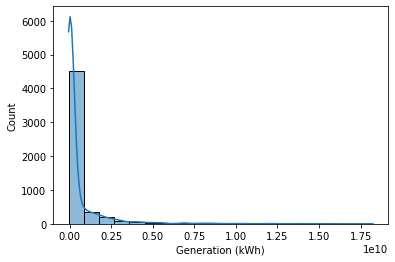

In [44]:
# shows extreme values for 'fat'

sns.histplot(df_emissions['Generation (kWh)'], bins=20, kde = True) 


In [45]:
# Check how many extreme values

df_emissions[df_emissions['Generation (kWh)'] > .50e+10]

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Fuel Type
2,2,3,Barry,Alabama,ELECTRIC POWER,1.0,CT,NG,GAS,5.306391e+09,...,0.0,54733332.0,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,Gas
68,68,130,Cross,South Carolina,ELECTRIC POWER,1.0,ST,RC,COAL,8.350087e+09,...,0.0,3554612.0,Tons,8757880.34,7945096.93,SERC,SC,South Carolina Public Service Authority,Carolinas,Coal
70,70,136,Seminole (FL),Florida,ELECTRIC POWER,1.0,ST,BIT,COAL,7.036179e+09,...,0.0,2894192.0,Tons,7241940.93,6569845.72,SERC,SEC,Seminole Electric Cooperative,Florida,Coal
99,99,298,Limestone,Texas,ELECTRIC POWER,2.0,ST,SUB,COAL,8.659128e+09,...,0.0,5611655.0,Tons,9668230.99,8770961.62,TRE,ERCO,"Electric Reliability Council of Texas, Inc.","Electric Reliability Council of Texas, Inc.",Coal
144,144,470,Comanche (CO),Colorado,ELECTRIC POWER,1.0,ST,SUB,COAL,8.303352e+09,...,0.0,5062869.0,Tons,9553388.34,8666777.04,WECC,WACM,Western Area Power Administration - Rocky Moun...,Northwest,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,4523,56671,Longview Power Plant,West Virginia,ELECTRIC POWER,2.0,ST,BIT,COAL,5.248694e+09,...,0.0,1805766.0,Tons,4767039.32,4324629.70,RFC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Coal
4891,4891,58260,Brunswick County Power Station,Virginia,ELECTRIC POWER,1.0,CT,NG,GAS,8.333358e+09,...,0.0,55257273.0,Mcf,3353446.56,3042226.77,SERC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas
5060,5060,59906,Moxie Freedom Generation Plant,Pennsylvania,ELECTRIC POWER,2.0,CS,NG,GAS,6.955629e+09,...,0.0,43916338.0,Mcf,2645445.08,2399932.03,RFC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas
5061,5061,59913,Greensville County Power Station,Virginia,ELECTRIC POWER,1.0,CT,NG,GAS,9.859878e+09,...,0.0,62400069.0,Mcf,3786995.29,3435539.59,SERC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas


In [65]:
# Checking how many rows there are

df_emissions.shape

(5074, 23)

In [66]:
# Seeing what percent of the rows are outlier values

x = 104/5074

x

0.020496649586125345

Very extreme outliers were not removed from the above because it could be the case that some plants have very high emissions. However, I do note that about 2% of the values for Generation are extremely high (this is such a small amount it should be negligable).

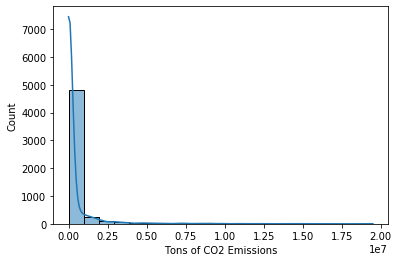

In [48]:
# shows extreme values for Emissions

sns.histplot(df_emissions['Tons of CO2 Emissions'], bins=20, kde = True) 


In [49]:
# Check how many extreme values for Emissions

df_emissions[df_emissions['Generation (kWh)'] > .50e+10]

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Fuel Type
2,2,3,Barry,Alabama,ELECTRIC POWER,1.0,CT,NG,GAS,5.306391e+09,...,0.0,54733332.0,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,Gas
68,68,130,Cross,South Carolina,ELECTRIC POWER,1.0,ST,RC,COAL,8.350087e+09,...,0.0,3554612.0,Tons,8757880.34,7945096.93,SERC,SC,South Carolina Public Service Authority,Carolinas,Coal
70,70,136,Seminole (FL),Florida,ELECTRIC POWER,1.0,ST,BIT,COAL,7.036179e+09,...,0.0,2894192.0,Tons,7241940.93,6569845.72,SERC,SEC,Seminole Electric Cooperative,Florida,Coal
99,99,298,Limestone,Texas,ELECTRIC POWER,2.0,ST,SUB,COAL,8.659128e+09,...,0.0,5611655.0,Tons,9668230.99,8770961.62,TRE,ERCO,"Electric Reliability Council of Texas, Inc.","Electric Reliability Council of Texas, Inc.",Coal
144,144,470,Comanche (CO),Colorado,ELECTRIC POWER,1.0,ST,SUB,COAL,8.303352e+09,...,0.0,5062869.0,Tons,9553388.34,8666777.04,WECC,WACM,Western Area Power Administration - Rocky Moun...,Northwest,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,4523,56671,Longview Power Plant,West Virginia,ELECTRIC POWER,2.0,ST,BIT,COAL,5.248694e+09,...,0.0,1805766.0,Tons,4767039.32,4324629.70,RFC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Coal
4891,4891,58260,Brunswick County Power Station,Virginia,ELECTRIC POWER,1.0,CT,NG,GAS,8.333358e+09,...,0.0,55257273.0,Mcf,3353446.56,3042226.77,SERC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas
5060,5060,59906,Moxie Freedom Generation Plant,Pennsylvania,ELECTRIC POWER,2.0,CS,NG,GAS,6.955629e+09,...,0.0,43916338.0,Mcf,2645445.08,2399932.03,RFC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas
5061,5061,59913,Greensville County Power Station,Virginia,ELECTRIC POWER,1.0,CT,NG,GAS,9.859878e+09,...,0.0,62400069.0,Mcf,3786995.29,3435539.59,SERC,PJM,"PJM Interconnection, LLC",Mid-Atlantic,Gas


The same amount of rows as for Generation, 2%, have emissions higher than the decided upon value. This makes me believe either there is a consistent error or since these are correlated they make sense.

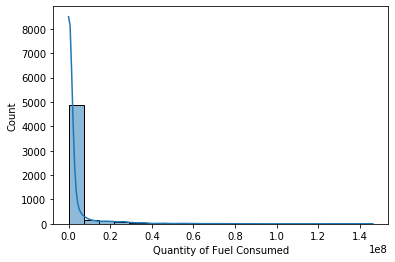

In [50]:
# shows extreme values for 'fat'

sns.histplot(df_emissions['Quantity of Fuel Consumed'], bins=20, kde = True) 


In [51]:
# Check how many extreme values for Fuel Consumption

df_emissions[df_emissions['Quantity of Fuel Consumed'] > .4e+8]

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Fuel Type
2,2,3,Barry,Alabama,ELECTRIC POWER,1.0,CT,NG,GAS,5.306391e+09,...,0.0,54733332.0,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,Gas
212,212,609,Cape Canaveral,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,5.376777e+09,...,0.0,43174979.0,Mcf,2588920.37,2348653.16,SERC,FPL,Florida Power & Light Co.,Florida,Gas
215,215,612,Fort Myers,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,5.687017e+09,...,0.0,60170133.0,Mcf,3584604.66,3251932.01,SERC,FPL,Florida Power & Light Co.,Florida,Gas
222,222,617,Port Everglades,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,4.753957e+09,...,0.0,47061018.0,Mcf,2824250.31,2562143.07,SERC,FPL,Florida Power & Light Co.,Florida,Gas
226,226,619,Riviera,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,4.328777e+09,...,0.0,41448267.0,Mcf,2487059.01,2256245.14,SERC,FPL,Florida Power & Light Co.,Florida,Gas
229,229,620,Sanford,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,5.595636e+09,...,0.0,61678327.0,Mcf,3702786.24,3359145.64,SERC,FPL,Florida Power & Light Co.,Florida,Gas
238,238,628,Crystal River,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,6.746584e+09,...,0.0,68966045.0,Mcf,4129375.03,3746144.45,SERC,FPC,"Duke Energy Florida, Inc.",Florida,Gas
243,243,634,P L Bartow,Florida,ELECTRIC POWER,1.0,CT,NG,GAS,4.008538e+09,...,0.0,44375022.0,Mcf,2647055.69,2401393.17,SERC,FPC,"Duke Energy Florida, Inc.",Florida,Gas
308,308,710,Jack McDonough,Georgia,ELECTRIC POWER,1.0,CT,NG,GAS,1.212183e+10,...,0.0,121135561.0,Mcf,7267746.62,6593256.48,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,Gas
412,412,1004,Edwardsport,Indianca,ELECTRIC POWER,1.0,CT,SGC,COAL,1.503324e+09,...,0.0,102872848.0,Mcf,3693530.04,3350748.47,RFC,MISO,"Midcontinent Independent System Operator, Inc.",Midwest,Coal


There are even less rows that are extreme outliers for Fuel Consumption, less than 1% of rows, and even then are not that extreme of outliers. These will also be left in.

Overall, no crazy outliers exist in the data. When the above was tested with higher, more extreme numbers there were no rows. This makes me believe the unrealistic data had already been dealt with before EIA released the data for public use.

## Plotting a Chloropleth with Geoplot

For this map, I will plot the CO2 Emissions of power plantsin each state.

In [83]:
#Selecting data to plot

data_to_plot = df_emissions[['State','Tons of CO2 Emissions']]


In [84]:
data_to_plot.head()

,State,Tons of CO2 Emissions
1,Alabama,87728.21
2,Alabama,3252938.83
3,Alabama,4270348.31
4,Alabama,97253.11
5,Alabama,135132.89


In [85]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Tons of CO2 Emissions'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Power Plant Emissions").add_to(map)
folium.LayerControl().add_to(map)

map

These results show that CO2 Emissions are concentrated very high in a few states and low in the rest. It would be interesting to make the map more specific to lead us to see which other states are higher than 0. It leads me to be curious why these states are higher emitters, is it powerplant type? 

## Export Data

In [87]:
# Export data to csv
df_emissions.to_csv(os.path.join(path1, 'Data', '2019 Emissions Clean and Wrangled.csv'))


# THE END!